In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline
plt.style.use("seaborn")

In [3]:
all_accuracies = pd.read_csv("../results/tables/all_results/accuracy.csv",
                            sep=";", index_col=0)

all_accuracies

,no-lang,target-lang,low-ttr,high-ttr,low-mattr,high-mattr
amh,5.7,11.1,12.9,11.3,10.5,8.3
chm,14.3,15.4,10.3,15.0,8.7,19.3
fra,60.3,53.0,25.7,48.6,22.8,12.3
hun,32.0,44.8,13.8,36.4,19.7,37.3
ind,48.3,57.1,22.6,51.9,32.7,22.0
isl,20.2,38.6,29.8,40.2,19.8,16.7
sme,15.1,19.1,14.6,19.6,19.0,22.3
vie,50.3,62.2,54.7,51.8,33.6,26.3


In [4]:
lr_df = all_accuracies.loc[["amh", "chm"]]
lr_df = lr_df[["target-lang", "low-ttr", "high-mattr"]]
lr_df

,target-lang,low-ttr,high-mattr
amh,11.1,12.9,8.3
chm,15.4,10.3,19.3


In [5]:
lr_df.rename(index={"amh": "Amharic", "chm": "Meadow Mari"},
            inplace=True)
lr_df.rename(columns={"target-lang": "using only target language adapter",
                     "low-ttr": "stacking morphologically similar language",
                     "high-mattr": "stacking morphologically distant language"}, inplace=True)

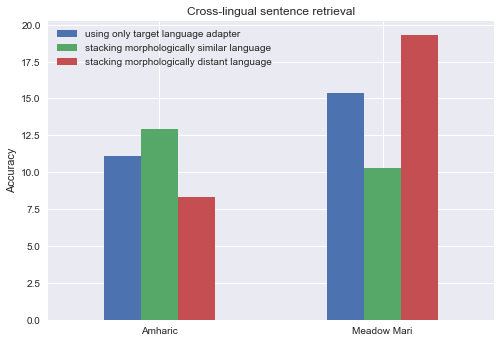

In [6]:
ax = lr_df.plot.bar(rot=0, ylabel="Accuracy", title="Cross-lingual sentence retrieval")

In [7]:
fig = ax.get_figure()
fig.savefig("../results/figures/thesis_examples/amh_chm.pdf")

<AxesSubplot:>

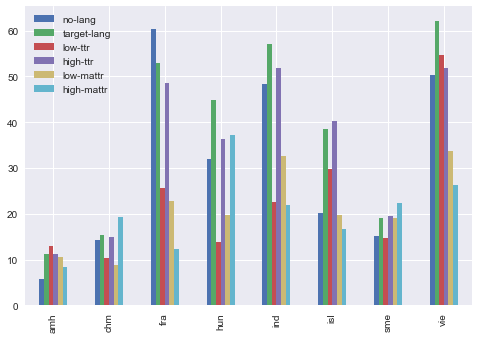

In [8]:
all_accuracies.plot.bar()

In [9]:
language_dict = {
    "amh": "Amharic", "chm": "Meadow Mari", "fra": "French", "hun": "Hungarian", "ind": "Indonesian",
    "isl": "Icelandic", "sme": "Northern\nSami", "vie": "Vietnamese"
}

In [20]:
no_target_lang_df = all_accuracies.filter(items=["no-lang", "target-lang"])
no_target_lang_df.rename(index=language_dict, inplace=True)
# no_target_lang_df["target-lang"] = no_target_lang_df["target-lang"] - no_target_lang_df["no-lang"]
# no_target_lang_df.loc["French"]["target-lang"] = 0
no_target_lang_df

,no-lang,target-lang
Amharic,5.7,11.1
Meadow Mari,14.3,15.4
French,60.3,53.0
Hungarian,32.0,44.8
Indonesian,48.3,57.1
Icelandic,20.2,38.6
Northern\nSami,15.1,19.1
Vietnamese,50.3,62.2


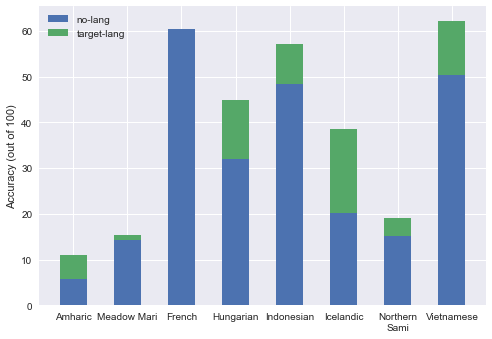

In [13]:
ax = no_target_lang_df.plot.bar(ylabel="Accuracy (out of 100)", stacked=True, rot=0)
ax.autoscale()

In [14]:
fig = ax.get_figure()
fig.savefig(f"../results/figures/thesis_examples/accuracy_no_vs_target.pdf")

In [22]:
eng = [8.3, 19.3, 50.7, 37.3, 49.1, 48.1, 22.3, 54.7]

no_target_lang_df["stacked with English"] = eng

In [16]:
48.1-38.6

9.5

In [17]:
9.5/38.6

0.24611398963730569

In [23]:
no_target_lang_df

,no-lang,target-lang,stacked with English
Amharic,5.7,11.1,8.3
Meadow Mari,14.3,15.4,19.3
French,60.3,53.0,50.7
Hungarian,32.0,44.8,37.3
Indonesian,48.3,57.1,49.1
Icelandic,20.2,38.6,48.1
Northern\nSami,15.1,19.1,22.3
Vietnamese,50.3,62.2,54.7


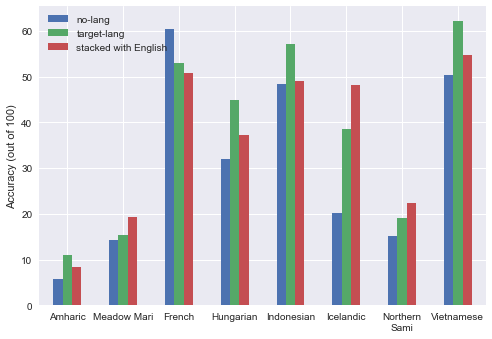

In [24]:
ax = no_target_lang_df.plot.bar(ylabel="Accuracy (out of 100)", rot=0)

In [25]:
fig = ax.get_figure()
fig.savefig(f"../results/figures/thesis_examples/eng-lang.pdf")

<AxesSubplot:>

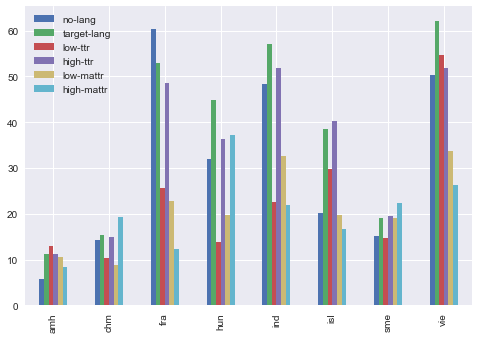

In [26]:
all_accuracies.plot.bar()

In [28]:
k3_accuracies = pd.read_csv("../results/tables/all_results/k_3_accuracy.csv",
                            sep=";", index_col=0)

k3_accuracies

,no-lang,target-lang,low-ttr,high-ttr,low-mattr,high-mattr
amh,9.3,15.3,15.8,14.9,14.9,11.5
chm,20.2,22.6,14.8,23.3,13.3,29.1
fra,70.5,64.6,38.7,60.2,34.5,21.1
hun,43.5,59.5,21.0,50.5,30.5,48.2
ind,61.6,71.1,31.0,64.6,44.3,32.3
isl,33.8,52.0,43.1,54.6,30.7,27.3
sme,19.9,28.8,20.4,29.0,27.2,31.6
vie,62.6,74.6,68.4,64.8,44.3,36.9


In [29]:
df_dict = defaultdict(dict)

for idx, row in all_accuracies.iterrows():
    lg = language_dict[idx]
#     print(idx)
#     print(row.max())
#     print(row.idxmax())
    df_dict[lg]["highest score"] = row.max()
    df_dict[lg]["best setup"] = row.idxmax()

In [30]:
df_dict = defaultdict(dict)

for idx, row in all_accuracies.iterrows():
    lg = language_dict[idx]
#     print(idx)
#     print(row.max())
#     print(row.idxmax())
    df_dict[lg]["lowest score"] = row.min()
    df_dict[lg]["worst setup"] = row.idxmin()

In [31]:
df_dict3 = defaultdict(dict)

for idx, row in k3_accuracies.iterrows():
    lg = language_dict[idx]
#     print(idx)
#     print(row.max())
#     print(row.idxmax())
    df_dict3[lg]["lowest score"] = row.min()
    df_dict3[lg]["worst setup"] = row.idxmin()

In [32]:
df_dict3

defaultdict(dict,
            {'Amharic': {'lowest score': 9.3, 'worst setup': 'no-lang'},
             'Meadow Mari': {'lowest score': 13.3, 'worst setup': 'low-mattr'},
             'French': {'lowest score': 21.1, 'worst setup': 'high-mattr'},
             'Hungarian': {'lowest score': 21.0, 'worst setup': 'low-ttr'},
             'Indonesian': {'lowest score': 31.0, 'worst setup': 'low-ttr'},
             'Icelandic': {'lowest score': 27.3, 'worst setup': 'high-mattr'},
             'Northern\nSami': {'lowest score': 19.9,
              'worst setup': 'no-lang'},
             'Vietnamese': {'lowest score': 36.9,
              'worst setup': 'high-mattr'}})

In [33]:
pd.DataFrame(df_dict3).T

,lowest score,worst setup
Amharic,9.3,no-lang
Meadow Mari,13.3,low-mattr
French,21.1,high-mattr
Hungarian,21.0,low-ttr
Indonesian,31.0,low-ttr
Icelandic,27.3,high-mattr
Northern\nSami,19.9,no-lang
Vietnamese,36.9,high-mattr


In [34]:
df_dict

defaultdict(dict,
            {'Amharic': {'lowest score': 5.7, 'worst setup': 'no-lang'},
             'Meadow Mari': {'lowest score': 8.7, 'worst setup': 'low-mattr'},
             'French': {'lowest score': 12.3, 'worst setup': 'high-mattr'},
             'Hungarian': {'lowest score': 13.8, 'worst setup': 'low-ttr'},
             'Indonesian': {'lowest score': 22.0, 'worst setup': 'high-mattr'},
             'Icelandic': {'lowest score': 16.7, 'worst setup': 'high-mattr'},
             'Northern\nSami': {'lowest score': 14.6,
              'worst setup': 'low-ttr'},
             'Vietnamese': {'lowest score': 26.3,
              'worst setup': 'high-mattr'}})

In [35]:
pd.DataFrame(df_dict).T

,lowest score,worst setup
Amharic,5.7,no-lang
Meadow Mari,8.7,low-mattr
French,12.3,high-mattr
Hungarian,13.8,low-ttr
Indonesian,22.0,high-mattr
Icelandic,16.7,high-mattr
Northern\nSami,14.6,low-ttr
Vietnamese,26.3,high-mattr


In [36]:
no_target_lang_df3 = k3_accuracies.filter(items=["no-lang", "target-lang"])
no_target_lang_df3.rename(index=language_dict, inplace=True)
# no_target_lang_df3["target-lang"] = no_target_lang_df3["target-lang"] - no_target_lang_df3["no-lang"]
# no_target_lang_df3.loc["French"]["target-lang"] = 0
no_target_lang_df3

,no-lang,target-lang
Amharic,9.3,15.3
Meadow Mari,20.2,22.6
French,70.5,64.6
Hungarian,43.5,59.5
Indonesian,61.6,71.1
Icelandic,33.8,52.0
Northern\nSami,19.9,28.8
Vietnamese,62.6,74.6


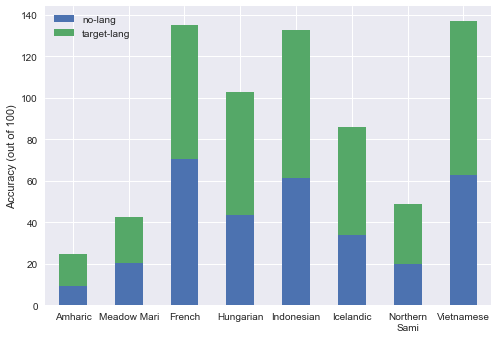

In [37]:
ax = no_target_lang_df3.plot.bar(ylabel="Accuracy (out of 100)",
                                                              stacked=True, rot=0)

In [39]:
eng3 = [11.5, 29.1, 62.9, 48.2, 61.4, 62.8, 31.6, 68.4]

no_target_lang_df3["stacked with English"] = eng3
no_target_lang_df3

,no-lang,target-lang,stacked with English
Amharic,9.3,15.3,11.5
Meadow Mari,20.2,22.6,29.1
French,70.5,64.6,62.9
Hungarian,43.5,59.5,48.2
Indonesian,61.6,71.1,61.4
Icelandic,33.8,52.0,62.8
Northern\nSami,19.9,28.8,31.6
Vietnamese,62.6,74.6,68.4


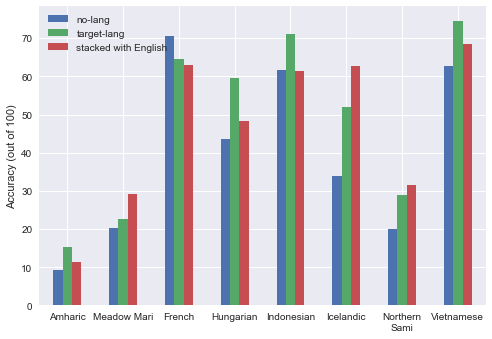

In [40]:
ax = no_target_lang_df3.plot.bar(ylabel="Accuracy (out of 100)", rot=0)

In [41]:
df3_dict = defaultdict(dict)

for idx, row in k3_accuracies.iterrows():
    lg = language_dict[idx]
#     print(idx)
#     print(row.max())
#     print(row.idxmax())
    df3_dict[lg]["highest score"] = row.max()
    df3_dict[lg]["best setup"] = row.idxmax()

In [42]:
pd.DataFrame(df3_dict).T

,highest score,best setup
Amharic,15.8,low-ttr
Meadow Mari,29.1,high-mattr
French,70.5,no-lang
Hungarian,59.5,target-lang
Indonesian,71.1,target-lang
Icelandic,54.6,high-ttr
Northern\nSami,31.6,high-mattr
Vietnamese,74.6,target-lang


In [43]:
pd.DataFrame(df_dict).T

,lowest score,worst setup
Amharic,5.7,no-lang
Meadow Mari,8.7,low-mattr
French,12.3,high-mattr
Hungarian,13.8,low-ttr
Indonesian,22.0,high-mattr
Icelandic,16.7,high-mattr
Northern\nSami,14.6,low-ttr
Vietnamese,26.3,high-mattr


In [47]:
def get_colour(column_name):
    if column_name == "low-dttr":
        return "tab:green"
    elif column_name == "high-dttr":
        return "tab:red"
    elif column_name == "low-dmattr":
        return "tab:purple"
    elif column_name == "high-dmattr":
        return "tab:gray"


def get_worst_best_results(language, worst_result_column, best_result_column):
    language_df = all_accuracies.loc[language]
    language_df.rename(index={"low-ttr": "low-dttr", "high-ttr": "high-dttr",
                 "low-mattr": "low-dmattr", "high-mattr": "high-dmattr"}, inplace=True)
    language_df = language_df.filter(items=["no-lang", "target-lang", worst_result_column, best_result_column])
    
    colours = ["tab:blue", "tab:orange"]
    
    # select the 3rd colour
    colour3 = get_colour(worst_result_column)
    # select the 4th colour
    colour4 = get_colour(best_result_column)
    
    colours.append(colour3)
    colours.append(colour4)
    
    ax = language_df.plot.bar(color=colours,
                             rot=0,
                             ylabel="Accuracy scores (out of 100)")
    
    for p, s in zip(ax.patches, language_df):
        ax.annotate(str(f"{s}%"),
                   (p.get_x() + p.get_width() / 2, p.get_height()),
                   xytext=(0, 0), textcoords="offset points",
                   ha="center", va="bottom")
        
    fig = ax.get_figure()
    fig.savefig(f"../results/figures/thesis_examples/individual_languages/{language}_best_worst.pdf")

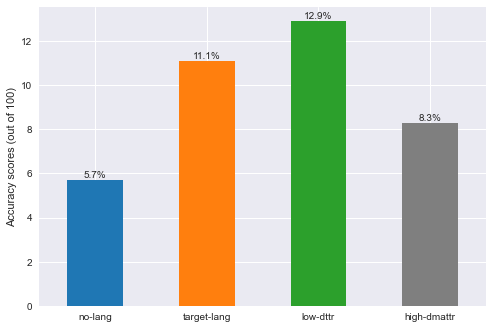

In [48]:
get_worst_best_results("amh", "low-dttr", "high-dmattr")

In [ ]:
# ax = hun_dmattr.plot.bar(color=["tab:blue", "tab:orange", "tab:purple", "tab:gray"],
#                       rot=0,
#                       ylabel="Accuracy scores (out of 100)")

# for p, s in zip(ax.patches, hun_dmattr):
#     ax.annotate(str(f"{s}%"), (p.get_x() + p.get_width() / 2, p.get_height()),
#                 xytext=(0, 0), textcoords="offset points", ha="center", va="bottom")
    
# fig = ax.get_figure()
# fig.savefig('/Users/marcellfekete/Downloads/hungarian_dmattr.pdf')

# plt.show()

In [49]:
amh = all_accuracies.loc["amh"]
amh.rename(index={"low-ttr": "low-dttr", "high-ttr": "high-dttr",
                 "low-mattr": "low-dmattr", "high-mattr": "high-dmattr"}, inplace=True)
amh

no-lang         5.7
target-lang    11.1
low-dttr       12.9
high-dttr      11.3
low-dmattr     10.5
high-dmattr     8.3
Name: amh, dtype: float64

In [50]:
hun = all_accuracies.loc["hun"]
hun.rename(index={"low-ttr": "low-dttr", "high-ttr": "high-dttr",
                 "low-mattr": "low-dmattr", "high-mattr": "high-dmattr"}, inplace=True)
hun

no-lang        32.0
target-lang    44.8
low-dttr       13.8
high-dttr      36.4
low-dmattr     19.7
high-dmattr    37.3
Name: hun, dtype: float64

In [51]:
# generate no-lang vs target-lang
hun_no_target = hun.filter(items=["no-lang", "target-lang"])
hun_no_target

no-lang        32.0
target-lang    44.8
Name: hun, dtype: float64

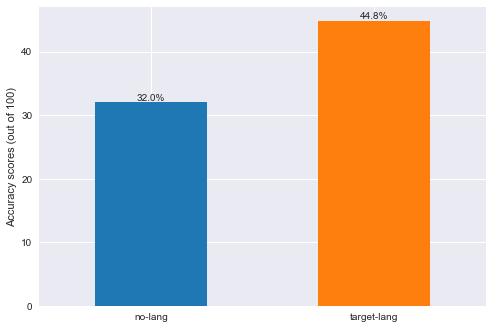

In [52]:
ax = hun_no_target.plot.bar(color=["tab:blue", "tab:orange"],
                            rot=0,
#                             title="Comparing two baseline setups for Hungarian",
                           ylabel="Accuracy scores (out of 100)",
#                            xlabel="Experimental setup name"
                           )

for p, s in zip(ax.patches, hun_no_target):
    ax.annotate(str(f"{s}%"), (p.get_x() + p.get_width() / 2, p.get_height()),
                xytext=(0, 0), textcoords="offset points", ha="center", va="bottom")
    
fig = ax.get_figure()
fig.savefig('../results/figures/thesis_examples/individual_languages/hungarian_baseline.pdf')

plt.show()

In [53]:
hun_dttr = hun.filter(items=["no-lang", "target-lang", "low-dttr", "high-dttr"])
print(type(hun_dttr))
# hun_dttr.rename(index={"low-ttr": "low-dttr", "high-ttr": "high-dttr"}, inplace=True)
hun_dttr

<class 'pandas.core.series.Series'>


no-lang        32.0
target-lang    44.8
low-dttr       13.8
high-dttr      36.4
Name: hun, dtype: float64

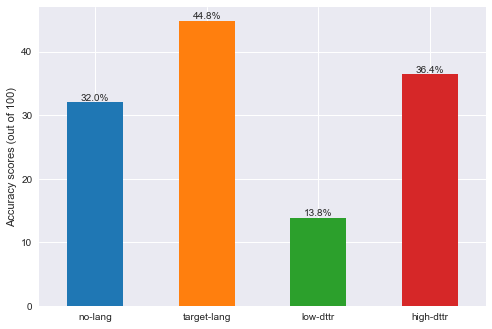

In [54]:
ax = hun_dttr.plot.bar(color=["tab:blue", "tab:orange", "tab:green", "tab:red"],
                      rot=0,
                      ylabel="Accuracy scores (out of 100)")

for p, s in zip(ax.patches, hun_dttr):
    ax.annotate(str(f"{s}%"), (p.get_x() + p.get_width() / 2, p.get_height()),
                xytext=(0, 0), textcoords="offset points", ha="center", va="bottom")
    
fig = ax.get_figure()
fig.savefig('../results/figures/thesis_examples/individual_languages/hungarian_dttr.pdf')

plt.show()

In [55]:
hun_dmattr = hun.filter(items=["no-lang", "target-lang", "low-dmattr", "high-dmattr"])
print(type(hun_dttr))
# hun_dmattr.rename(index={"low-mattr": "low-dmattr", "high-mattr": "high-dmattr"}, inplace=True)
hun_dmattr

<class 'pandas.core.series.Series'>


no-lang        32.0
target-lang    44.8
low-dmattr     19.7
high-dmattr    37.3
Name: hun, dtype: float64

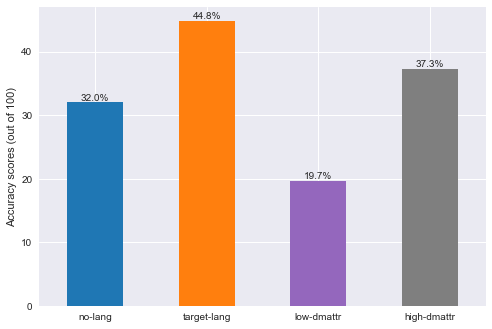

In [56]:
ax = hun_dmattr.plot.bar(color=["tab:blue", "tab:orange", "tab:purple", "tab:gray"],
                      rot=0,
                      ylabel="Accuracy scores (out of 100)")

for p, s in zip(ax.patches, hun_dmattr):
    ax.annotate(str(f"{s}%"), (p.get_x() + p.get_width() / 2, p.get_height()),
                xytext=(0, 0), textcoords="offset points", ha="center", va="bottom")
    
fig = ax.get_figure()
fig.savefig('../results/figures/thesis_examples/individual_languages/hungarian_dmattr.pdf')

plt.show()

In [57]:
hun.rename(index={"low-dttr": "low-dttr\nFinnish",
                 "high-dttr": "high-dttr\nVietnamese",
                 "low-dmattr": "low-dmattr\nRussian",
                 "high-dmattr": "high-dmattr\nEnglish"},
          inplace=True)

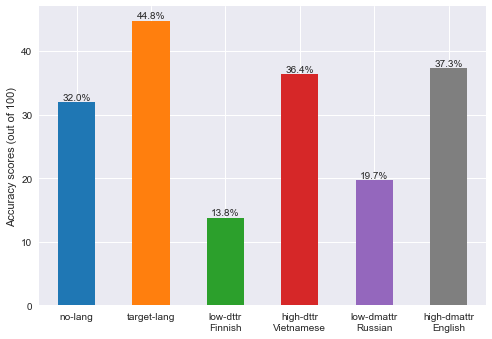

In [58]:
ax = hun.plot.bar(color=["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:gray"],
            rot=0,
            ylabel="Accuracy scores (out of 100)")

for p, s in zip(ax.patches, hun):
    ax.annotate(str(f"{s}%"), (p.get_x() + p.get_width() / 2, p.get_height()),
                xytext=(0, 0), textcoords="offset points", ha="center", va="bottom")
    
fig = ax.get_figure()
fig.savefig('../results/figures/thesis_examples/individual_languages/all_hungarian.pdf')

plt.show()

In [59]:
languages = ["", "", "Finnish", "Vietnamese", "Russian", "English"]
hun_df = pd.DataFrame({"scores": hun, "languages": languages})
hun_df

,scores,languages
no-lang,32.0,
target-lang,44.8,
low-dttr\nFinnish,13.8,Finnish
high-dttr\nVietnamese,36.4,Vietnamese
low-dmattr\nRussian,19.7,Russian
high-dmattr\nEnglish,37.3,English
